In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar la carpeta 'src' al sys.path
import sys
import os

sys.path.append(os.path.abspath("../src"))

# Ahora puedes importar utils
from utils import cargar_datos_pd
from utils import ver_resumen_nulos
from utils import limpiar_letras_de_numeros
from utils import obtener_filas_no_numericas
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import obtener_filas_no_fechas

ruta_archivo = "../data/hotel_bookings.csv"
columna = 'nombre_columna'
titulo = 'titulo'

columnas_numericas =['is_canceled','lead_time',
'arrival_date_year',
'arrival_date_week_number',
'arrival_date_day_of_month',
'stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'children',
'babies',
'is_repeated_guest',
'previous_cancellations',
'previous_bookings_not_canceled',
'booking_changes',
'days_in_waiting_list',
'adr',
'required_car_parking_spaces',
'total_of_special_requests']

columnas_no_numericas = ['arrival_date_month',
'meal',
'market_segment',
'distribution_channel',
'reserved_room_type',
'assigned_room_type',
'deposit_type',
'customer_type',
'reservation_status',
'reservation_status_date']

def vBox():
  sns.boxplot(x=df[columna])
  plt.title(titulo)
  plt.show()

#Carganos el archivo. Se modifico manualmente el archivo para la limpieza.
df = cargar_datos_pd(ruta_archivo)

def vr():
  print(ver_resumen_nulos(df))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
arrival_date_month,119390,0,0.00
arrival_date_week_number,119390,0,0.00
lead_time,119390,0,0.00
is_canceled,119390,0,0.00
stays_in_weekend_nights,119390,0,0.00
stays_in_week_nights,119390,0,0.00


In [5]:
#El dato company tiene 94% de nulos y es irrelevante en cuanto a la experiencia y opiniones de los huespedes.
#Vamos a eliminarlo.
columna = 'company'
df= df.drop(columna,axis=1)

In [6]:
#Ya solo tenemos 31 columnas, y no mas 32.
#agent, corre con la misma suerte.
#Vamos a eliminarlo.
columna = 'agent'
df= df.drop(columna,axis=1)

In [7]:
#country tampoco aporta nada.
columna = 'country'
df= df.drop(columna,axis=1)



In [8]:
#Ya CASI no tenemos nulos. children es irrelevante, 0%
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
hotel,119390,0,0.0
is_canceled,119390,0,0.0
lead_time,119390,0,0.0
arrival_date_year,119390,0,0.0
arrival_date_month,119390,0,0.0
arrival_date_week_number,119390,0,0.0
arrival_date_day_of_month,119390,0,0.0
stays_in_weekend_nights,119390,0,0.0
stays_in_week_nights,119390,0,0.0
adults,119390,0,0.0


In [9]:
#campo children. Listamos los que tienen nulos.
campo='children'
#df.loc[df[campo].isnull()]
df.loc[~df[campo].isnull()]
#DF sin campo children nulos.
df_chNN = df.loc[~df[campo].isnull()]

#Vemos la descripcion del campo
df_chNN[campo].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [10]:
df_chNN.loc[df_chNN[campo].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [11]:
df_chNN[campo].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [12]:
#Antes de continuar veo cuales no son numericas. Solo children
cantidadNoNumericas = 0
cantidadDF = df.shape[0]
filas_no_numericas = obtener_filas_no_numericas(df, columnas_numericas)
if not filas_no_numericas.empty:
    cantidadNoNumericas = filas_no_numericas.shape[0]
    print(f"Existen {cantidadNoNumericas} filas con valores no numéricos del total de filas {cantidadDF} en las columnas especificadas:")
    print(filas_no_numericas[columnas_numericas])
else:
    print("Todas las filas de las columnas especificadas contienen solo valores numéricos.")

Existen 4 filas con valores no numéricos del total de filas 119390 en las columnas especificadas:
       is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
40600            1          2               2015                        32   
40667            1          1               2015                        32   
40679            1          1               2015                        32   
41160            1          8               2015                        33   

       arrival_date_day_of_month  stays_in_weekend_nights  \
40600                          3                        1   
40667                          5                        0   
40679                          5                        0   
41160                         13                        2   

       stays_in_week_nights  adults  children  babies  is_repeated_guest  \
40600                     0       2       NaN       0                  0   
40667                     2       2       NaN       0

In [13]:
#Me parece rara su distribución, quite las que son nulas, verifique todas las columnas numericas y solo las que no lo son son de children.
#Es muy poco por lo que voy a interpolar nada mas. No me cuadra hacerlo por las estadisticas.
# Interpolación de valores faltantes
df[campo] = df[campo].interpolate()


In [23]:
#ver duplicados
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
117,Resort Hotel,0,92,2015,July,27,4,4,6,2,...,D,0,No Deposit,0,Contract,71.55,0,1,Check-Out,2015-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [14]:
#Eliminar duplicados en todas las columnas:
df.drop_duplicates(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85598 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85598 non-null  object 
 1   is_canceled                     85598 non-null  int64  
 2   lead_time                       85598 non-null  int64  
 3   arrival_date_year               85598 non-null  int64  
 4   arrival_date_month              85598 non-null  object 
 5   arrival_date_week_number        85598 non-null  int64  
 6   arrival_date_day_of_month       85598 non-null  int64  
 7   stays_in_weekend_nights         85598 non-null  int64  
 8   stays_in_week_nights            85598 non-null  int64  
 9   adults                          85598 non-null  int64  
 10  children                        85598 non-null  float64
 11  babies                          85598 non-null  int64  
 12  meal                            8559

In [16]:
ver_resumen_nulos(df)
#Ya no tenemos nulos.

,datos sin NAs en q,Na en q,Na en %
hotel,85598,0,0.0
is_canceled,85598,0,0.0
lead_time,85598,0,0.0
arrival_date_year,85598,0,0.0
arrival_date_month,85598,0,0.0
arrival_date_week_number,85598,0,0.0
arrival_date_day_of_month,85598,0,0.0
stays_in_weekend_nights,85598,0,0.0
stays_in_week_nights,85598,0,0.0
adults,85598,0,0.0


In [46]:
columnas_no_numericas = ['arrival_date_month',
'meal',
'market_segment',
'distribution_channel',
'reserved_room_type',
'assigned_room_type',
'deposit_type',
'customer_type',
'reservation_status',
'reservation_status_date']



In [48]:
#Tenemos 85598 filas
def control_categoricos():
    print(df[campo].value_counts().sort_index())
    if df[campo].value_counts().sort_index().sum()!= df.shape[0]:
      print(f"Campo:{campo} Control de cantidad Error, no tienen todos los registros")
    else:
      print(f"Campo:{campo} Control de cantidad de registro correctos! Cantidad Filas:{df[campo].value_counts().sort_index().sum()}") 


In [49]:
# Iterar sobre la lista de campos y aplicar la función a cada uno
# Todos los campos no numericos, estan completos
for campo in columnas_no_numericas:
    control_categoricos()

arrival_date_month
April         7771
August       11147
December      5057
February      5994
January       4583
July          9934
June          7574
March         7348
May           8143
November      4825
October       6742
September     6480
Name: count, dtype: int64
Campo:arrival_date_month Control de cantidad de registro correctos! Cantidad Filas:85598
meal
BB           66524
FB             358
HB            8887
SC            9359
Undefined      470
Name: count, dtype: int64
Campo:meal Control de cantidad de registro correctos! Cantidad Filas:85598
market_segment
Aviation           206
Complementary      699
Corporate         4071
Direct           11692
Groups            4430
Offline TA/TO    13367
Online TA        51131
Undefined            2
Name: count, dtype: int64
Campo:market_segment Control de cantidad de registro correctos! Cantidad Filas:85598
distribution_channel
Corporate     4806
Direct       12831
GDS            175
TA/TO        67781
Undefined        5
Name: count

In [50]:
# Los meses son correctos.
campo = 'arrival_date_month'
control_categoricos()

arrival_date_month
April         7771
August       11147
December      5057
February      5994
January       4583
July          9934
June          7574
March         7348
May           8143
November      4825
October       6742
September     6480
Name: count, dtype: int64
Campo:arrival_date_month Control de cantidad de registro correctos! Cantidad Filas:85598


In [51]:
# Los meal son correctos.
campo = 'meal'
control_categoricos()

meal
BB           66524
FB             358
HB            8887
SC            9359
Undefined      470
Name: count, dtype: int64
Campo:meal Control de cantidad de registro correctos! Cantidad Filas:85598


In [52]:
# Los market_segment son correctos.
campo = 'market_segment'
control_categoricos()

market_segment
Aviation           206
Complementary      699
Corporate         4071
Direct           11692
Groups            4430
Offline TA/TO    13367
Online TA        51131
Undefined            2
Name: count, dtype: int64
Campo:market_segment Control de cantidad de registro correctos! Cantidad Filas:85598


In [53]:
# Los distribution_channel son correctos.
campo = 'distribution_channel'
control_categoricos()

distribution_channel
Corporate     4806
Direct       12831
GDS            175
TA/TO        67781
Undefined        5
Name: count, dtype: int64
Campo:distribution_channel Control de cantidad de registro correctos! Cantidad Filas:85598


In [54]:
# Los reserved_room_type son correctos.
campo = 'reserved_room_type'
control_categoricos()

reserved_room_type
A    54988
B      980
C      912
D    17238
E     6011
F     2812
G     2049
H      596
L        6
P        6
Name: count, dtype: int64
Campo:reserved_room_type Control de cantidad de registro correctos! Cantidad Filas:85598


In [55]:
# Los assigned_room_type son correctos.
campo = 'assigned_room_type'
control_categoricos()

assigned_room_type
A    45028
B     1757
C     2146
D    22091
E     7133
F     3609
G     2493
H      706
I      356
K      272
L        1
P        6
Name: count, dtype: int64
Campo:assigned_room_type Control de cantidad de registro correctos! Cantidad Filas:85598


In [56]:
# Los deposit_type son correctos.
campo = 'deposit_type'
control_categoricos()

deposit_type
No Deposit    84474
Non Refund     1033
Refundable       91
Name: count, dtype: int64
Campo:deposit_type Control de cantidad de registro correctos! Cantidad Filas:85598


In [57]:
# Los customer_type son correctos.
campo = 'customer_type'
control_categoricos()

customer_type
Contract            3096
Group                543
Transient          71349
Transient-Party    10610
Name: count, dtype: int64
Campo:customer_type Control de cantidad de registro correctos! Cantidad Filas:85598


In [59]:
# Los reservation_status son correctos.
campo = 'reservation_status'
control_categoricos()

reservation_status
Canceled     22989
Check-Out    61595
No-Show       1014
Name: count, dtype: int64
Campo:reservation_status Control de cantidad de registro correctos! Cantidad Filas:85598


In [60]:
# Los reservation_status son correctos.
campo = 'reservation_status_date'
control_categoricos()

reservation_status_date
2014-10-17    11
2014-11-18     1
2015-01-01    45
2015-01-02    16
2015-01-18     1
              ..
2017-09-08     4
2017-09-09     6
2017-09-10     4
2017-09-12     1
2017-09-14     2
Name: count, Length: 926, dtype: int64
Campo:reservation_status_date Control de cantidad de registro correctos! Cantidad Filas:85598


In [62]:
#Este campo reservation_status_date es fecha, vemos si esta bien hecho.
from utils import obtener_filas_no_fechas
obtener_filas_no_fechas(df, columna, '%Y-%m-%d')
#Todas las fechas son correctas. Este dato NO ES CATEGORICO

""


In [64]:
#Control de datos anomalos
campo='lead_time'
df[campo].describe()

count    85598.000000
mean        79.437510
std         85.509428
min          0.000000
25%         11.000000
50%         49.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64

In [65]:
#Control de datos anomalos
campo='stays_in_weekend_nights'
df[campo].describe()

count    85598.000000
mean         1.009732
std          1.034567
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64

In [66]:
#Control de datos anomalos
campo='stays_in_week_nights'
df[campo].describe()

count    85598.000000
mean         2.635319
std          2.062824
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64

In [ ]:
# Hay muchos que no pasan la noche en un hotel ...
df[df[campo]==0]

In [68]:
#Control de datos anomalos
campo='adults'
df[campo].describe()

count    85598.000000
mean         1.882007
std          0.626903
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: adults, dtype: float64

# 2) Exploración de Datos:
> **Visualizaciones exploratorias univariadas:** Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

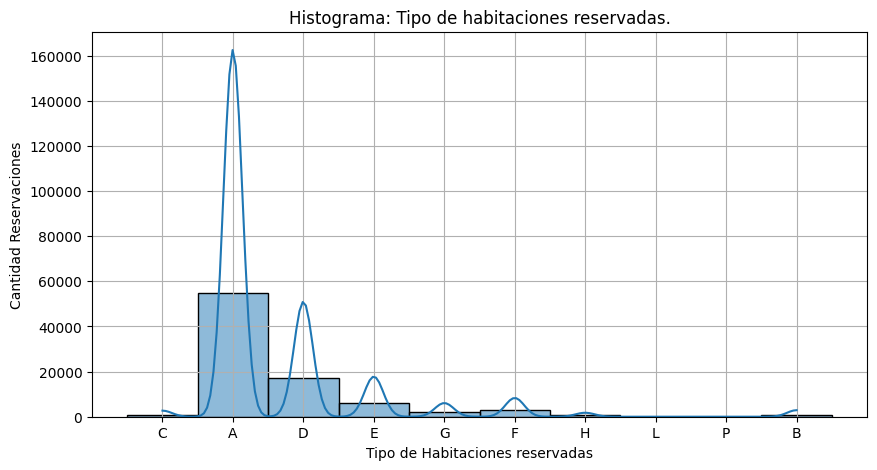

In [72]:
# Visualización 1: Histograma de reserved_room_type
#Código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.
columna = 'reserved_room_type'
titulo = 'Histograma: Tipo de habitaciones reservadas.'
plt.figure(figsize=(10, 5))
sns.histplot(df[columna], bins=20, kde=True)
plt.title(titulo)
plt.ylabel('Cantidad Reservaciones')
plt.xlabel('Tipo de Habitaciones reservadas')
plt.grid(True)
plt.show()

In [76]:
df[columna].value_counts().sort_index

<bound method Series.sort_index of reserved_room_type
A    54988
D    17238
E     6011
F     2812
G     2049
B      980
C      912
H      596
L        6
P        6
Name: count, dtype: int64>

In [ ]:
# El tipo de habitación A es evidentemente el mas solicitado.

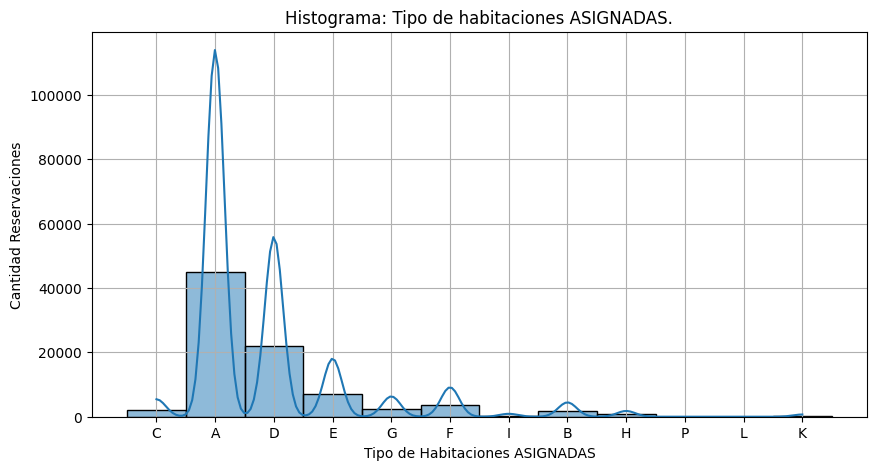

In [77]:
# Visualización 2: Histograma de assigned_room_type
# Código para el tipo de habitación asignada a la reserva. A veces, el tipo de habitación asignada difiere del tipo de habitación reservada debido al hotel.
columna = 'assigned_room_type'
titulo = 'Histograma: Tipo de habitaciones ASIGNADAS.'
plt.figure(figsize=(10, 5))
sns.histplot(df[columna], bins=20, kde=True)
plt.title(titulo)
plt.ylabel('Cantidad Reservaciones')
plt.xlabel('Tipo de Habitaciones ASIGNADAS')
plt.grid(True)
plt.show()

In [78]:
df[columna].value_counts().sort_index

<bound method Series.sort_index of assigned_room_type
A    45028
D    22091
E     7133
F     3609
G     2493
C     2146
B     1757
H      706
I      356
K      272
P        6
L        1
Name: count, dtype: int64>

In [80]:
# Obtener conteos de cada columna. Le pedi a chatgpt que me compare las reservaciones y asignaciones
conteo_reservaciones = df['reserved_room_type'].value_counts()
conteo_asignaciones = df['assigned_room_type'].value_counts()

# Combinar los conteos en un DataFrame
comparacion = pd.DataFrame({
    'Habitaciones Reservadas': conteo_reservaciones,
    'Habitaciones Asignadas': conteo_asignaciones,
    'Diferencia': (conteo_reservaciones-conteo_asignaciones)
}).fillna(0)  # Rellenar valores NaN con 0 para categorías que no aparecen en alguna columna

# Convertir a enteros
comparacion = comparacion.astype(int)

print(comparacion)

   Habitaciones Reservadas  Habitaciones Asignadas  Diferencia
A                    54988                   45028        9960
B                      980                    1757        -777
C                      912                    2146       -1234
D                    17238                   22091       -4853
E                     6011                    7133       -1122
F                     2812                    3609        -797
G                     2049                    2493        -444
H                      596                     706        -110
I                        0                     356           0
K                        0                     272           0
L                        6                       1           5
P                        6                       6           0


In [ ]:
# Hubo un 18% de personas con overbooking. Les dieron otros tipo de habitaciones. Parece que algo no se coorina muy bien.

# **Visualizaciones exploratorias multivariadas:** Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Veo que hay un 18% de overbooking quiero observar como eso afecta a las asignaciones de habitaciones.

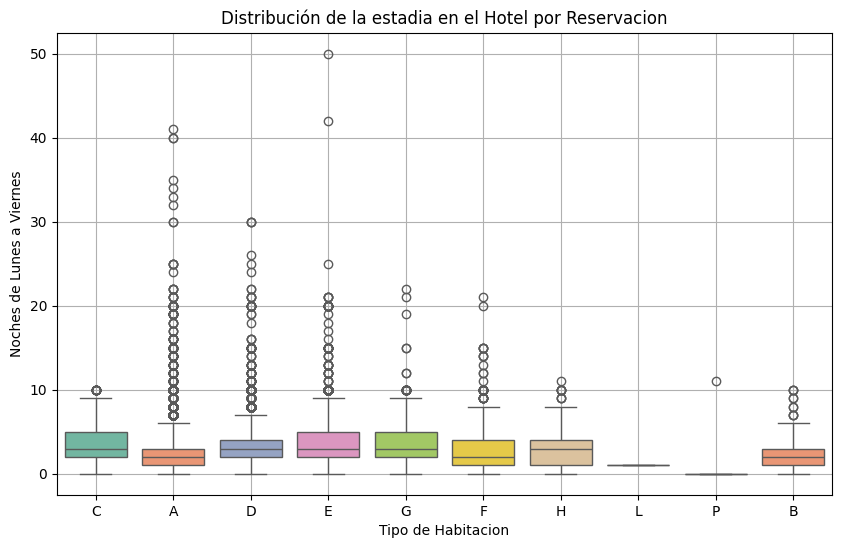

In [115]:
# Crear un gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='reserved_room_type', y='stays_in_week_nights',hue='reserved_room_type', palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de la estadia en el Hotel por Reservacion')
plt.xlabel('Tipo de Habitacion')
plt.ylabel('Noches de Lunes a Viernes')
plt.grid()

# Mostrar el gráfico
plt.show()

 Se observa que hay outliers muy notorios en la Distribución de la estadia en el Hotel por Reservacion. El mas resaltante es del E.
 Pero el A es el que afectara al grafico de Distribución de estadia en el Hotel PERO POR HABITACION ASIGNADA

Boxplot de Noches Lunes a Viernes del Tipo de Habitacion Reservada A. columna:stays_in_week_nights
count    54988.000000
mean         2.397469
std          1.908747
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         41.000000
Name: stays_in_week_nights, dtype: float64
Límite inferior (bigote inferior): -2.0
Límite superior (bigote superior): 6.0


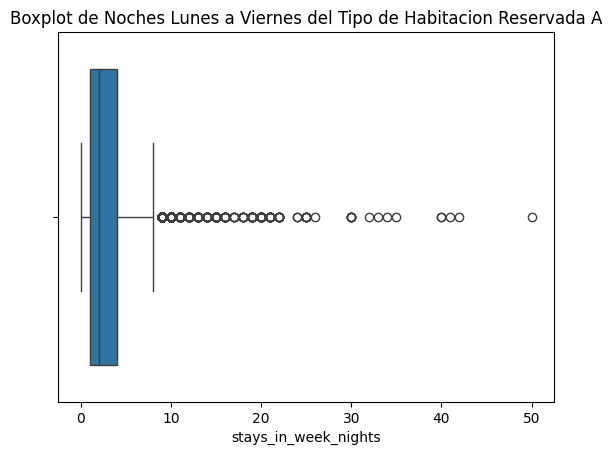

In [109]:
# Estadísticas descriptivas columna = 'reserved_room_type' pero por TIPO A solamente
df_tipo_A = df.loc[df['reserved_room_type']=='A']
columna = 'stays_in_week_nights'
titulo = 'Boxplot de Noches Lunes a Viernes del Tipo de Habitacion Reservada A'
print(f'{titulo}. columna:{columna}')
print(df_tipo_A[columna].describe())
imprimir_bigotes(df_tipo_A[columna])
# Boxplot para detectar valores atípicos 
vBox()

Al observar el A se observan que desde cero noches hasta 6 noches son lo usual, mas de eso ya son valores atipicos.

Boxplot de Noches Lunes a Viernes del Tipo de Habitacion Reservada C. columna:stays_in_week_nights
count    912.000000
mean       3.364035
std        2.093621
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: stays_in_week_nights, dtype: float64
Límite inferior (bigote inferior): -2.5
Límite superior (bigote superior): 9.5


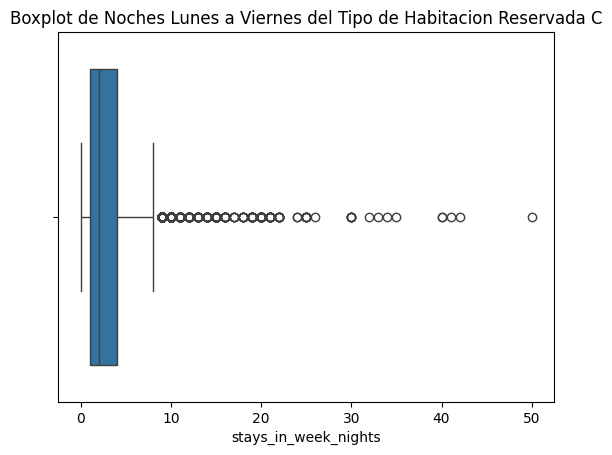

In [111]:
# Estadísticas descriptivas columna = 'reserved_room_type' solamente el Tipo C
df_tipo_C = df.loc[df['reserved_room_type']=='C']
columna = 'stays_in_week_nights'
titulo = 'Boxplot de Noches Lunes a Viernes del Tipo de Habitacion Reservada C'
print(f'{titulo}. columna:{columna}')
print(df_tipo_C[columna].describe())
imprimir_bigotes(df_tipo_C[columna])
# Boxplot para detectar valores atípicos 
vBox()

En cuanto a reservaciones para el C, van desde cero dias hasta 9 dias.

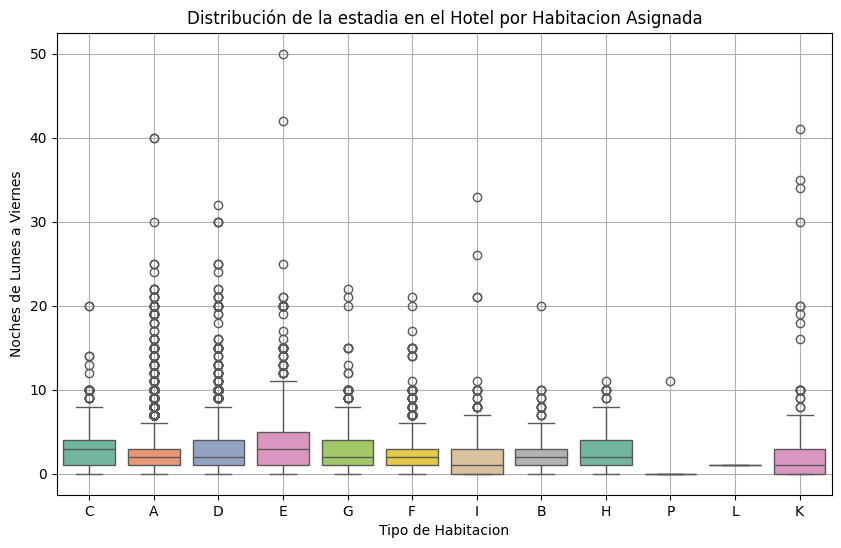

In [105]:
# Crear un gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='assigned_room_type', y='stays_in_week_nights',hue='assigned_room_type', palette='Set2')

# Personalizar el gráfico
plt.title('Distribución de la estadia en el Hotel por Habitacion Asignada')
plt.xlabel('Tipo de Habitacion')
plt.ylabel('Noches de Lunes a Viernes')
plt.grid()

# Mostrar el gráfico
plt.show()

Boxplot de Noches Lunes a Viernes del Tipo de Habitacion ASIGNADA A. columna:stays_in_week_nights
count    45028.000000
mean         2.497979
std          1.909196
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: stays_in_week_nights, dtype: float64
Límite inferior (bigote inferior): -2.0
Límite superior (bigote superior): 6.0


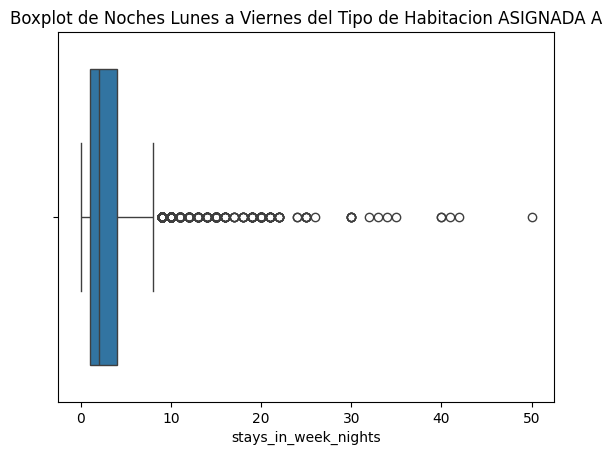

In [110]:
# Estadísticas descriptivas columna = 'assigned_room_type' pero tipo A
df_tipo_A = df.loc[df['assigned_room_type']=='A']
columna = 'stays_in_week_nights'
titulo = 'Boxplot de Noches Lunes a Viernes del Tipo de Habitacion ASIGNADA A'
print(f'{titulo}. columna:{columna}')
print(df_tipo_A[columna].describe())
imprimir_bigotes(df_tipo_A[columna])
# Boxplot para detectar valores atípicos 
vBox()

Boxplot de Noches Lunes a Viernes del Tipo de Habitacion ASIGNADA C. columna:stays_in_week_nights
count    2146.000000
mean        2.925443
std         2.120834
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: stays_in_week_nights, dtype: float64
Límite inferior (bigote inferior): -3.5
Límite superior (bigote superior): 8.5


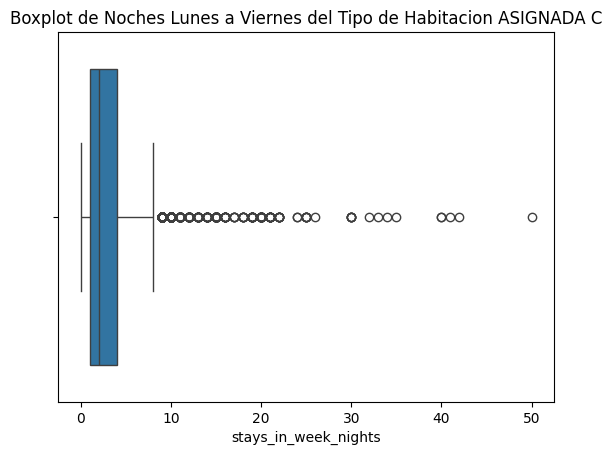

In [112]:
# Estadísticas descriptivas columna = 'assigned_room_type' pero tipo C
df_tipo_C = df.loc[df['assigned_room_type']=='C']
columna = 'stays_in_week_nights'
titulo = 'Boxplot de Noches Lunes a Viernes del Tipo de Habitacion ASIGNADA C'
print(f'{titulo}. columna:{columna}')
print(df_tipo_C[columna].describe())
imprimir_bigotes(df_tipo_C[columna])
# Boxplot para detectar valores atípicos 
vBox()

Se observa claramente como el overbooking de las reservas tipo A afectaron a las asignaciones del tipo C.
En las reservas C era de 0 a 9 noches, y en las asignaciones son de 0 a 8 noches.
Sinembargo los bigotes de A no cambiaron, ni visualmente cambiaron los valores atipicos.
Los cambios se dieron entre las reservas típicas y atípicas pues el máximo de A bajo de 41 a 40.

Boxplot de Noches Lunes a Viernes. columna:stays_in_week_nights
count    85598.000000
mean         2.635319
std          2.062824
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: stays_in_week_nights, dtype: float64
Límite inferior (bigote inferior): -3.5
Límite superior (bigote superior): 8.5


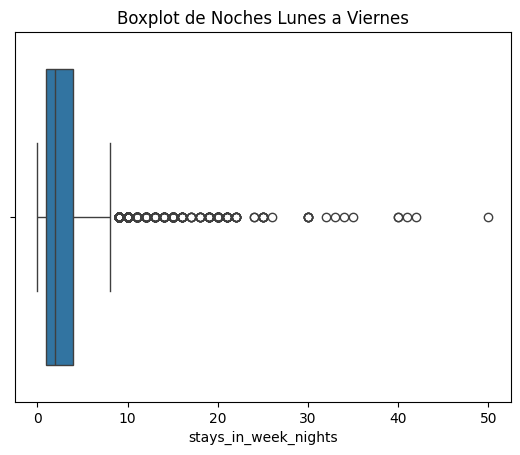

In [114]:
# Estadísticas descriptivas columna = 'columna = 'stays_in_week_nights' de todo el dataset
columna = 'stays_in_week_nights'
titulo = 'Boxplot de Noches Lunes a Viernes'
print(f'{titulo}. columna:{columna}')
print(df[columna].describe())
imprimir_bigotes(df[columna])
# Boxplot para detectar valores atípicos 
vBox()

Se puede ver que los huespedes se quedan entre 0 y hasta 8 noches
Los huespedes que se quedan 0 noches indican que el hotel da servicios a personas que solo necesitan la habitacion en el dia.

Los bigotes en general son iguales a los bigores de las habitaciones asignadas tipo C

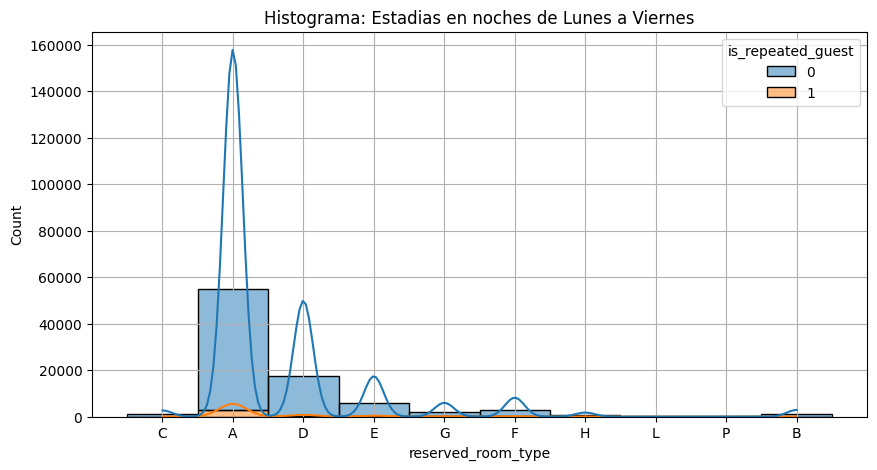

In [117]:
# Visualización 1: Histograma de Reservaciones por huespedes reincidentes
columna = 'reserved_room_type'
titulo = 'Histograma: Estadias en noches de Lunes a Viernes'
plt.figure(figsize=(10, 5))
sns.histplot(df,x=columna,hue='is_repeated_guest',multiple='stack',kde=True)
plt.title(titulo)
plt.grid(True)
plt.show()

Es muy bajo la cantidad de huespedes que regresan.
Pero es evidente que deben implementar Calificaciones para sabe exactamente. 
Sin eso no es posible medir la satisfaccion de los huespedes, pero por este indicador, hay poca recurrencia.
Si los huespedes no regresan, justifica plenamente la necesidad de los empresarios por comprender por que no regresan.

También el overbooking es del 18%, si la habitación no es mejor a la reservada, entonces esto puede ser una experiencia desagradable para el huesped.
Se debe mejorar el proceso de reservas, ver cuales son los canales que estan ocasionando el overbooking.

# Es muy necesario una encuesta de satisfacción de los Huespedes!

# En busca de posibles relaciones adicionales.

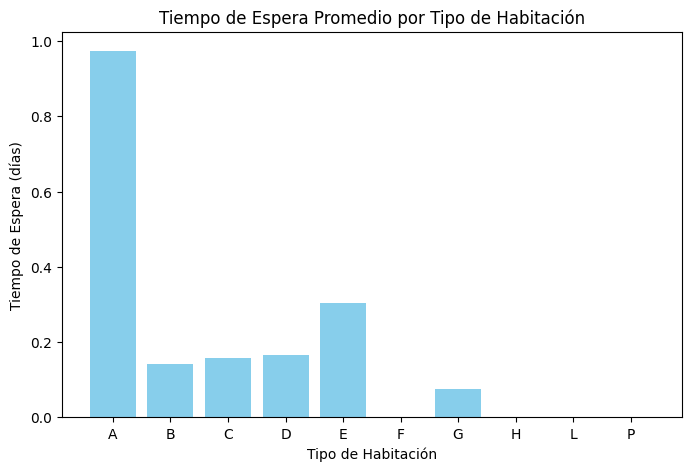

In [123]:
# Calcular el tiempo de espera promedio por tipo de habitación
avg_waiting_time = df.groupby('reserved_room_type')['days_in_waiting_list'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(avg_waiting_time['reserved_room_type'], avg_waiting_time['days_in_waiting_list'], color='skyblue')
plt.title('Tiempo de Espera Promedio por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Tiempo de Espera (días)')
plt.xticks(rotation=0)  # Mantener etiquetas horizontales
plt.show()


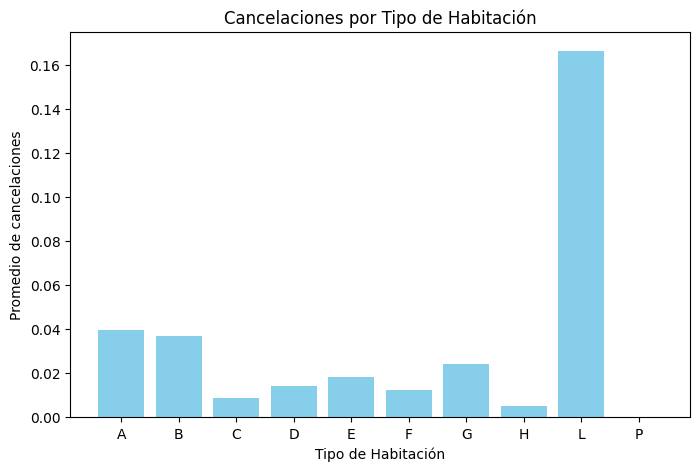

In [125]:
# Calcular el promedio de cancelaciones por tipo de habitación
avg_waiting_time = df.groupby('reserved_room_type')['previous_cancellations'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(avg_waiting_time['reserved_room_type'], avg_waiting_time['previous_cancellations'], color='skyblue')
plt.title('Cancelaciones por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Promedio de cancelaciones')
plt.xticks(rotation=0)  # Mantener etiquetas horizontales
plt.show()


Al observar el tiempo de espera por las reservaciones y el promedio de cancelaciones aparentemente el tipo de habitacion A tiene muy buenas referencias por eso la gente espera mucho y no cancela, mientras que la del tipo L no hay espera pero es la que mas cancelaciones tiene.